In [102]:
### GROUP MEMBERS: CHAEWOON HONG (ME), AKSHAY ANIL, ATUL BJHARATI

import pandas as pd
from pandas import DataFrame
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

In [103]:
### PROBLEM 1 ### - ATUL BJHARATI
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID"
team_salaries = pd.read_sql(salary_query, conn)
team_salaries

,yearID,teamID,total_payroll
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0
5,1985,CHN,12702917.0
6,1985,CIN,8359917.0
7,1985,CLE,6551666.0
8,1985,DET,10348143.0
9,1985,HOU,9993051.0


In [105]:
winning_percentage_query = "SELECT Teams.yearID, Teams.teamID, franchID, G, W, (W * 1.0)/(G) * 100 as win_percentage " \
                           " FROM Teams JOIN Salaries ON Teams.teamID = Salaries.teamID AND " \
                           " Teams.yearID = Salaries.yearID GROUP BY Teams.yearID, Teams.teamID"
winning_percentages = pd.read_sql(winning_percentage_query, conn)
winning_percentages

# I dealt with missing data by using an inner join. The Teams table had missing data but with the inner join, this problem could
# be handled. The inner join The inner join occurred where the Teams table and the Salaries table shared the same teamID and
# yearID.

,yearID,teamID,franchID,G,W,win_percentage
0,1985,ATL,ATL,162,66,40.740741
1,1985,BAL,BAL,161,83,51.552795
2,1985,BOS,BOS,163,81,49.693252
3,1985,CAL,ANA,162,90,55.555556
4,1985,CHA,CHW,163,85,52.147239
5,1985,CHN,CHC,162,77,47.530864
6,1985,CIN,CIN,162,89,54.938272
7,1985,CLE,CLE,162,60,37.037037
8,1985,DET,DET,161,84,52.173913
9,1985,HOU,HOU,162,83,51.234568


Text(0,0.5,'Payroll (le8)')

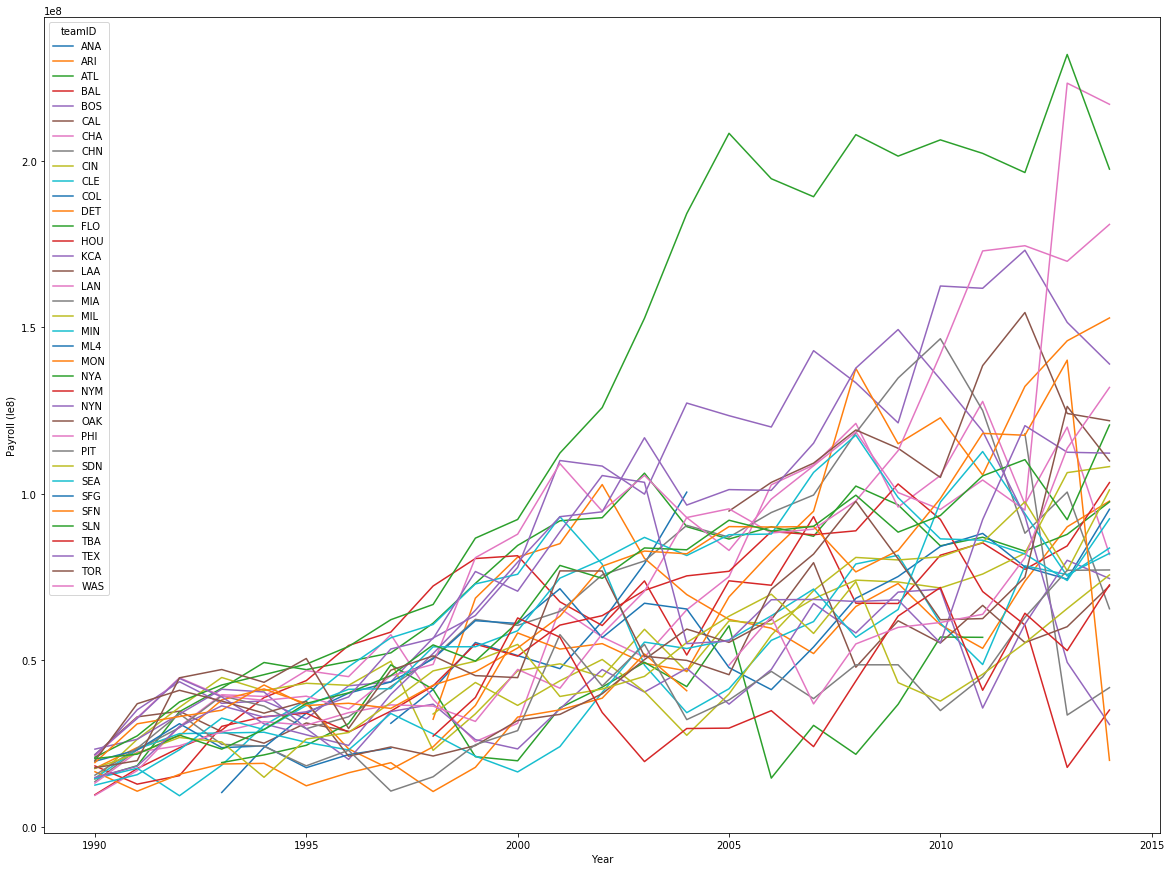

In [155]:
### PROBLEM 2 ### - AKSHAY ANIL

# Get year, team, and sum of salary for each combination of teamID and yearID
teams = "SELECT yearID, teamID , sum(salary) as salary FROM Salaries WHERE yearID >= 1990 GROUP BY teamID, yearID"

# Turn it into a dataframe
team_query = pd.read_sql(teams, conn)

# Create a plot where the x-axis is year, y-axis is salary, and individual lines for each team
team_query = team_query.pivot(index='yearID', columns='teamID', values='salary')

# Display the plot
team_query.plot(figsize=(20,15))
plt.xlabel('Year')
plt.ylabel('Payroll (le8)')

### QUESTION 1 ###
# The distribution of payrolls increases over time. In the 1990s, all the teams had similar payrolls, but the difference in 
# payrolls across the teams started to spread out increasing over time. The range drastically increases from 1990 to recent years.
# Additionally, the mean value for the yearly salaries increases from 1990 to 2014.

Text(0,0.5,'Range of Payroll')

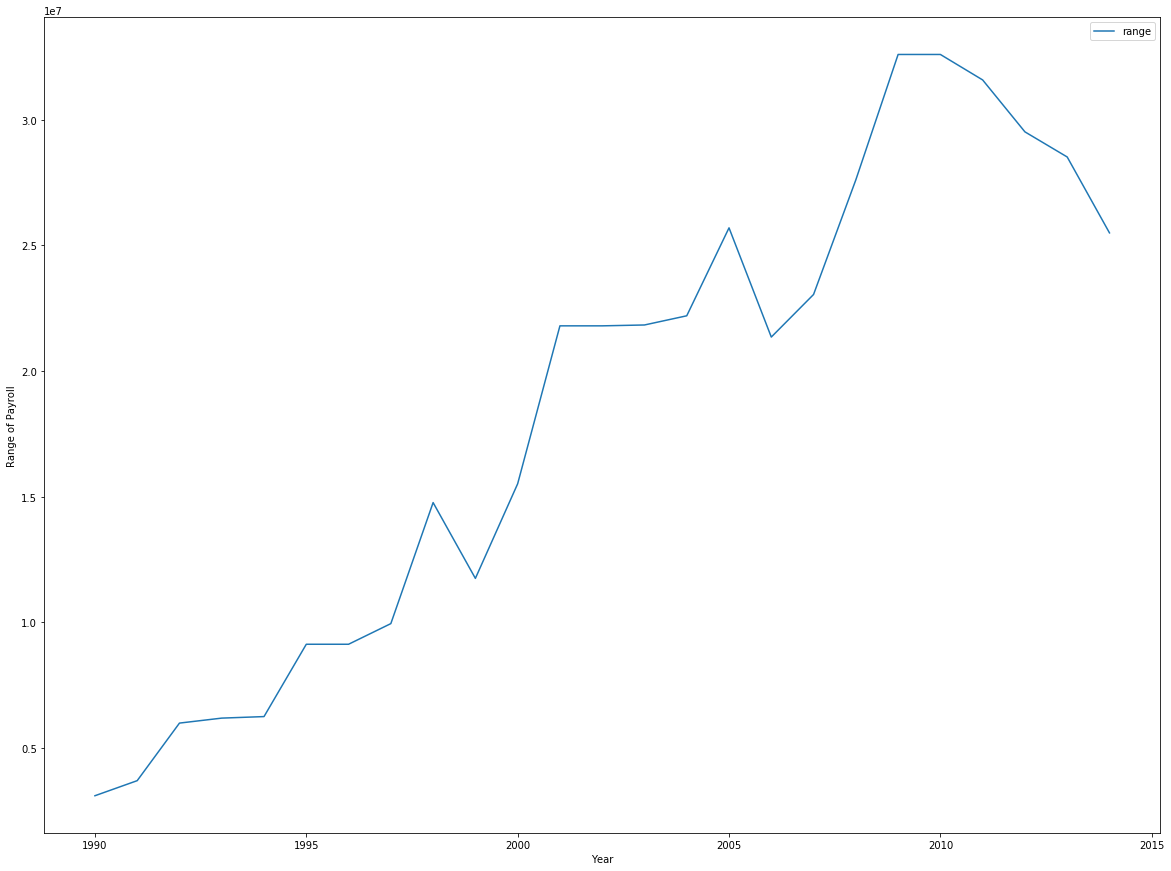

In [156]:
### PROBLEM 3 ### - CHAEWOON HONG

# gather data on the range of salaries per year
range = "SELECT yearID, MAX(salary) as max_salary, MIN(NULLIF(salary,0)) as min_salary, MAX(salary) - MIN(NULLIF(salary,0))" \
        " as range FROM Salaries WHERE yearID >= 1990 GROUP BY yearID"
range_query = pd.read_sql(range, conn)
range_query.plot(x = "yearID", y = "range",figsize=(20,15))
range_query

plt.xlabel('Year')
plt.ylabel('Range of Payroll')

# The graph of the ranges from 1990 - 2014 shows that the range has actually started to decrease again after steadily
# increasing from 1990 to 2010.


In [129]:
### PROBLEM 4 ### - CHAEWOON HONG

year = "SELECT MIN(yearID) as min_year, MAX(yearID) as max_year FROM Salaries WHERE yearID >= 1990"

#contains the min and max year
year_query = pd.read_sql(year, conn)

min = year_query["min_year"]
max = year_query["max_year"]
years = []

#min and max year from Salaries Table
min = int(min[0])
max = int(max[0])

#add all the years from the minimum to maximum year into the years[] array
while min <= max:
    years.append(min)
    min += 1

cut = pd.cut(years,5)

one = cut[0]
two = cut[6]
three = cut[12]
four = cut[18]
five = cut[24]
print (cut)
print()

winning_percentage_query = "SELECT Teams.yearID, Teams.teamID, franchID, G, W, (W * 1.0)/(G) * 100 as win_percentage" \
                            ", sum(Salaries.salary)/COUNT(salary) as payroll FROM Teams JOIN Salaries ON Teams.teamID = Salaries.teamID AND " \
                            " Teams.yearID = Salaries.yearID WHERE Teams.yearID >= 1990 GROUP BY Teams.yearID, Teams.teamID"
winning_percentages = pd.read_sql(winning_percentage_query, conn)
winning_percentages

[(1989.976, 1994.8], (1989.976, 1994.8], (1989.976, 1994.8], (1989.976, 1994.8], (1989.976, 1994.8], ..., (2009.2, 2014.0], (2009.2, 2014.0], (2009.2, 2014.0], (2009.2, 2014.0], (2009.2, 2014.0]]
Length: 25
Categories (5, interval[float64]): [(1989.976, 1994.8] < (1994.8, 1999.6] < (1999.6, 2004.4] < (2004.4, 2009.2] < (2009.2, 2014.0]]



,yearID,teamID,franchID,G,W,win_percentage,payroll
0,1990,ATL,ATL,162,65,40.123457,4.548594e+05
1,1990,BAL,BAL,161,76,47.204969,2.616239e+05
2,1990,BOS,BOS,162,88,54.320988,6.424479e+05
3,1990,CAL,ANA,162,80,49.382716,6.205714e+05
4,1990,CHA,CHW,162,94,58.024691,3.061774e+05
5,1990,CHN,CHC,162,77,47.530864,4.394839e+05
6,1990,CIN,CIN,162,91,56.172840,4.226471e+05
7,1990,CLE,CLE,162,77,47.530864,4.390000e+05
8,1990,DET,DET,162,79,48.765432,5.331284e+05
9,1990,HOU,HOU,162,75,46.296296,5.912903e+05


In [97]:
#store the win percentages that belong in the right bins
#initialized as dict
wbin1 = {}
wbin2 = {}
wbin3 = {}
wbin4 = {}
wbin5 = {}

#store the payroll that belong in the right bins
#initialized as dict
pbin1 = {}
pbin2 = {}
pbin3 = {}
pbin4 = {}
pbin5 = {}

#count how many times each team has appeared in the bin (to find the average later)
tot1 = {}
tot2 = {}
tot3 = {}
tot4 = {}
tot5 = {}

for i,row in winning_percentages.iterrows():
    if row['yearID'] in one:
        if row['teamID'] in wbin1:
            #sum up the win percentages and payroll for the same team in the bin
            wbin1[row['teamID']] += row['win_percentage']
            pbin1[row['teamID']] += row['payroll']
            #add one to the number of times the team has appeared 
            tot1 [row['teamID']] += 1
        else:
            #first time adding a value into the key
            wbin1[row['teamID']] = row['win_percentage']
            pbin1[row['teamID']] = row['payroll']
            tot1[row['teamID']] = 1
    if row['yearID'] in two:
        if row['teamID'] in wbin2:
            wbin2[row['teamID']] += row['win_percentage']
            pbin2[row['teamID']] += row['payroll']
            tot2 [row['teamID']] += 1
        else:
            wbin2[row['teamID']] = row['win_percentage']
            pbin2[row['teamID']] = row['payroll']
            tot2 [row['teamID']] = 1
    if row['yearID'] in three:
        if row['teamID'] in wbin3:
            wbin3[row['teamID']] += row['win_percentage']
            pbin3[row['teamID']] += row['payroll']
            tot3 [row['teamID']] += 1
        else:
            wbin3[row['teamID']] = row['win_percentage']
            pbin3[row['teamID']] = row['payroll']
            tot3 [row['teamID']] = 1
    if row['yearID'] in four:
        if row['teamID'] in wbin4:
            wbin4[row['teamID']] += row['win_percentage']
            pbin4[row['teamID']] += row['payroll']
            tot4 [row['teamID']] += 1
        else:
            wbin4[row['teamID']] = row['win_percentage']
            pbin4[row['teamID']] = row['payroll']
            tot4 [row['teamID']] = 1
    if row['yearID'] in five:
        if row['teamID'] in wbin5:
            wbin5[row['teamID']] += row['win_percentage']
            pbin5[row['teamID']] += row['payroll']
            tot5 [row['teamID']] += 1
        else:
            wbin5[row['teamID']] = row['win_percentage']
            pbin5[row['teamID']] = row['payroll']
            tot5 [row['teamID']] = 1

# x and y values for plotting
#xvals is the payroll
xvals = []
#yvals is the win percentage
yvals = []
    
#add the average payroll for each team in the bin    
for (x,y) in zip(list(pbin1.values()),list(tot1.values())):
    xvals.append(x/y)
    
#add the average win percentages for each team in the bin
for (x,y) in zip(list(wbin1.values()),list(tot1.values())):
    yvals.append(x/y)


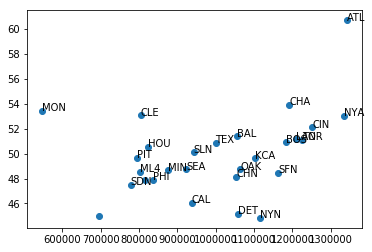

In [130]:
plt.scatter(xvals,yvals)
for i, txt in enumerate(pbin1):
    plt.annotate(txt, (xvals[i], yvals[i]))

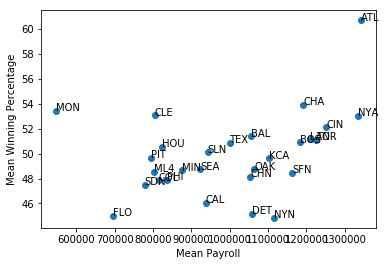

In [131]:
xvals = []
yvals = []

for (x,y) in zip(list(pbin2.values()),list(tot2.values())):
    xvals.append(x/y)
    
for (x,y) in zip(list(wbin2.values()),list(tot2.values())):
    yvals.append(x/y)
    
plt.scatter(xvals,yvals)
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning Percentage')

for i, txt in enumerate(wbin2):
    plt.annotate(txt, (xvals[i], yvals[i]))

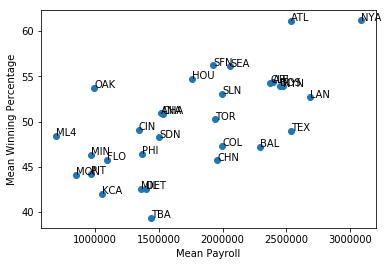

In [132]:
xvals = []
yvals = []

for (x,y) in zip(list(pbin3.values()),list(tot3.values())):
    xvals.append(x/y)
    
for (x,y) in zip(list(wbin3.values()),list(tot3.values())):
    yvals.append(x/y)

plt.scatter(xvals,yvals)
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning Percentage')

for i, txt in enumerate(wbin3):
    plt.annotate(txt, (xvals[i], yvals[i]))

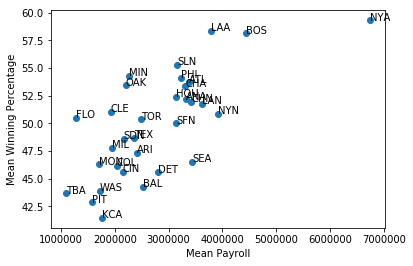

In [133]:
xvals = []
yvals = []
    
for (x,y) in zip(list(pbin4.values()),list(tot4.values())):
    xvals.append(x/y)
    
for (x,y) in zip(list(wbin4.values()),list(tot4.values())):
    yvals.append(x/y)
    
plt.scatter(xvals,yvals)
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning Percentage')

for i, txt in enumerate(wbin4):
    plt.annotate(txt, (xvals[i], yvals[i]))

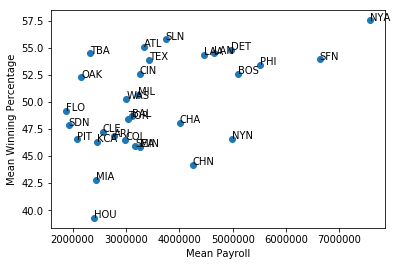

In [134]:
xvals = []
yvals = []

for (x,y) in zip(list(pbin5.values()),list(tot5.values())):
    xvals.append(x/y)
    
for (x,y) in zip(list(wbin5.values()),list(tot5.values())):
    yvals.append(x/y)
    
plt.scatter(xvals,yvals)
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning Percentage')

for i, txt in enumerate(wbin5):
    plt.annotate(txt, (xvals[i], yvals[i]))

In [135]:
### QUESTION 2 ###

'''

The team payrolls increase at an alarming rate until the fourth to the fifth bin where it seems to settle. The two teams that seem 
particularly good at paying for wins across these time periods are ATL and NYA. Based on the data, Oakland A's spending efficiency
is very impressive. Even though Oakland A is near the middle or the bottom when it comes to the average payroll, they average 
over a 50% win rate. One thing I noticed from looking at the graphs is that as time passes, teams are starting to get better at 
maximizing their win rate with smaller payrolls. This is especially evident in the fifth bin, where there are multiple teams above
the 50% win rate who have lower payrolls than other teams. 

'''

"\n\nThe team payrolls increase at an alarming rate until the fourth to the fifth bin where it seems to settle. The two teams that seem \nparticularly good at paying for wins across these time periods are ATL and NYA. Based on the data, Oakland A's spending efficiency\nis very impressive. Even though Oakland A is near the middle or the bottom when it comes to the average payroll, they average \nover a 50% win rate. One thing I noticed from looking at the graphs is that as time passes, teams are starting to get better at \nmaximizing their win rate with smaller payrolls. This is especially evident in the fifth bin, where there are multiple teams above\nthe 50% win rate who have lower payrolls than other teams. \n\n"

In [137]:
### PROBLEM 5 ### - AKSHAY ANIL

meanWRP_query = "WITH team_salary AS ( SELECT yearID, teamID, sum(salary) AS salary FROM Salaries WHERE yearID >= 1990 " \
                "GROUP BY yearID, teamID), win_rate AS ( SELECT yearID, teamID, G, W, (W*1.0)/(G) * 100 AS win_percentage " \
                "FROM Teams GROUP BY teamID, yearID), avg_team_salary AS ( SELECT yearID, avg(salary) as salary, count(*) as "\
                "team_count FROM team_salary GROUP BY yearID), team_summary AS ( SELECT ats.yearID, sum((ts.salary - ats.salary)"\
                " * (ts.salary - ats.salary)) / (ats.team_count - 1) AS stdDevSq FROM avg_team_salary AS ats INNER join "\
                "team_salary AS ts ON ts.yearID = ats.yearID GROUP by ats.yearID) SELECT ts.yearID, t.teamID, wr.win_percentage,"\
                " ats.salary AS avg_payrollj, t.salary AS payrollij, ts.stdDevSq FROM team_summary AS ts INNER JOIN "\
                "avg_team_salary AS ats ON ats.yearID = ts.yearID INNER JOIN team_salary AS t ON t.yearID = ts.yearID INNER JOIN "\
                "win_rate as wr ON wr.yearID = ts.yearID AND wr.teamID = t.teamID"

meanWRPs = pd.read_sql(meanWRP_query, conn)
meanWRPs['stdDev'] = np.sqrt((meanWRPs['stdDevSq']))
meanWRPs['standardized_payrollij'] = (meanWRPs['payrollij'] - meanWRPs['avg_payrollj'])/meanWRPs['stdDev']
meanWRPs


,yearID,teamID,win_percentage,avg_payrollj,payrollij,stdDevSq,stdDev,standardized_payrollij
0,1990,ATL,40.123457,1.707235e+07,14555501.0,1.422673e+13,3.771834e+06,-0.667275
1,1990,BAL,47.204969,1.707235e+07,9680084.0,1.422673e+13,3.771834e+06,-1.959861
2,1990,BOS,54.320988,1.707235e+07,20558333.0,1.422673e+13,3.771834e+06,0.924213
3,1990,CAL,49.382716,1.707235e+07,21720000.0,1.422673e+13,3.771834e+06,1.232198
4,1990,CHA,58.024691,1.707235e+07,9491500.0,1.422673e+13,3.771834e+06,-2.009859
5,1990,CHN,47.530864,1.707235e+07,13624000.0,1.422673e+13,3.771834e+06,-0.914238
6,1990,CIN,56.172840,1.707235e+07,14370000.0,1.422673e+13,3.771834e+06,-0.716456
7,1990,CLE,47.530864,1.707235e+07,14487000.0,1.422673e+13,3.771834e+06,-0.685437
8,1990,DET,48.765432,1.707235e+07,17593238.0,1.422673e+13,3.771834e+06,0.138098
9,1990,HOU,46.296296,1.707235e+07,18330000.0,1.422673e+13,3.771834e+06,0.333431


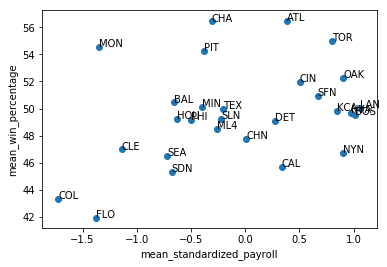

In [149]:
### PROBLEM 6 ### - ATUL BJHARATI

# finds the min and max year from Salaries table
year = "SELECT min(yearID) as min_year, max(yearID) as max_year FROM Salaries WHERE yearID >= 1990"
year_query = pd.read_sql(year, conn)

min = year_query['min_year']
max = year_query['max_year']
years = []

# gets min and max year from dataframe
min = int(min[0])
max = int(max[0])

# adds all the years from the min to max year into years array
while min <= max:
    years.append(min)
    min += 1

# discretizes year into five different time periods
cut = pd.cut(years, 5)

# intervals for five bins
one = cut[0]
two = cut[6]
three = cut[12]
four = cut[18]
five = cut[24]

# winning percentage and standardized payroll relation
query = "WITH team_salary AS (SELECT yearID, teamID, SUM(salary) AS salary FROM Salaries WHERE yearID >= 1990 " \
"GROUP BY yearID, teamID), win_rate AS (SELECT yearID, teamID, G, W, (W*1.0)/(G) * 100 AS win_percentage " \
"FROM Teams GROUP BY teamID, yearID), avg_team_salary AS (SELECT yearID, AVG(salary) AS salary, COUNT(*) AS team_count " \
"FROM team_salary GROUP BY yearID), team_summary AS (SELECT ats.yearID, SUM((ts.salary - ats.salary) * "\
"(ts.salary - ats.salary)) / (ats.team_count - 1) AS stdDevSq FROM avg_team_salary AS ats " \
"INNER JOIN team_salary AS ts ON ts.yearID = ats.yearID GROUP BY ats.yearID)" \
"SELECT ts.yearID, t.teamID, wr.win_percentage, ats.salary AS avg_payrollj, t.salary AS payrollij, ts.stdDevSq " \
"FROM team_summary AS ts INNER JOIN avg_team_salary AS ats ON ats.yearID = ts.yearID " \
"INNER JOIN team_salary AS t ON t.yearID = ts.yearID INNER JOIN win_rate AS wr ON wr.yearID = ts.yearID AND wr.teamID = t.teamID"

query_relation = pd.read_sql(query, conn)
query_relation['stdDev'] = np.sqrt((meanWRPs['stdDevSq']))
query_relation['standardized_payrollij'] = (meanWRPs['payrollij'] - meanWRPs['avg_payrollj'])/meanWRPs['stdDev']

# storage bins for mean win percentage
mwpbin1 = {}
mwpbin2 = {}
mwpbin3 = {}
mwpbin4 = {}
mwpbin5 = {}

# storage bins for standardized payroll
mspbin1 = {}
mspbin2 = {}
mspbin3 = {}
mspbin4 = {}
mspbin5 = {}

# counters for the frequency of each team in each bin
total1 = {}
total2 = {}
total3 = {}
total4 = {}
total5 = {}

for i, row in query_relation.iterrows():
    if row['yearID'] in one:
        if row['teamID'] in mwpbin1:
            # sums up the win percentage and standardized payroll for team and stores in bins
            mwpbin1[row['teamID']] += row['win_percentage']
            mspbin1[row['teamID']] += row['standardized_payrollij']
            # adds one to frequency of team in bin
            total1[row['teamID']] += 1
        else:
            # case where team is added to bin for first time
            mwpbin1[row['teamID']] = row['win_percentage']
            mspbin1[row['teamID']] = row['standardized_payrollij']
            total1[row['teamID']] = 1
    if row['yearID'] in two:
        if row['teamID'] in mwpbin2:
            mwpbin2[row['teamID']] += row['win_percentage']
            mspbin2[row['teamID']] += row['standardized_payrollij']
            total2[row['teamID']] += 1
        else:
            mwpbin2[row['teamID']] = row['win_percentage']
            mspbin2[row['teamID']] = row['standardized_payrollij']
            total2[row['teamID']] = 1
    if row['yearID'] in three:
        if row['teamID'] in mwpbin3:
            mwpbin3[row['teamID']] += row['win_percentage']
            mspbin3[row['teamID']] += row['standardized_payrollij']
            total3[row['teamID']] += 1
        else:
            mwpbin3[row['teamID']] = row['win_percentage']
            mspbin3[row['teamID']] = row['standardized_payrollij']
            total3[row['teamID']] = 1
    if row['yearID'] in four:
        if row['teamID'] in mwpbin4:
            mwpbin4[row['teamID']] += row['win_percentage']
            mspbin4[row['teamID']] += row['standardized_payrollij']
            total4[row['teamID']] += 1
        else:
            mwpbin4[row['teamID']] = row['win_percentage']
            mspbin4[row['teamID']] = row['standardized_payrollij']
            total4[row['teamID']] = 1
    if row['yearID'] in five:
        if row['teamID'] in mwpbin5:
            mwpbin5[row['teamID']] += row['win_percentage']
            mspbin5[row['teamID']] += row['standardized_payrollij']
            total5[row['teamID']] += 1
        else:
            mwpbin5[row['teamID']] = row['win_percentage']
            mspbin5[row['teamID']] = row['standardized_payrollij']
            total5[row['teamID']] = 1

# mean standardized payrolls
xvals = []
# mean win percentages
yvals = []

# adds mean standardized payroll for each team in bin
for (x, y) in zip(list(mspbin1.values()), list(total1.values())):
    xvals.append(x/y)
    
# adds mean win percentage for each team in bin    
for (x, y) in zip(list(mwpbin1.values()), list(total1.values())):
    yvals.append(x/y)

# scatter plot for first bin values
plt.scatter(xvals, yvals)
plt.xlabel('mean_standardized_payroll')
plt.ylabel('mean_win_percentage')

# gives labels to points
for i, txt in enumerate(mwpbin1):
    plt.annotate(txt, (xvals[i], yvals[i]))

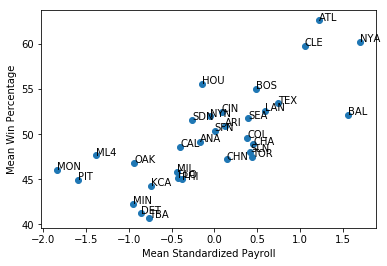

In [151]:
xvals = []
yvals = []

for (x, y) in zip(list(mspbin2.values()), list(total2.values())):
    xvals.append(x/y)

for (x, y) in zip(list(mwpbin2.values()), list(total2.values())):
    yvals.append(x/y)

# scatter plot for second bin values
plt.scatter(xvals, yvals)
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Win Percentage')

for i, txt in enumerate(mwpbin2):
    plt.annotate(txt, (xvals[i], yvals[i]))

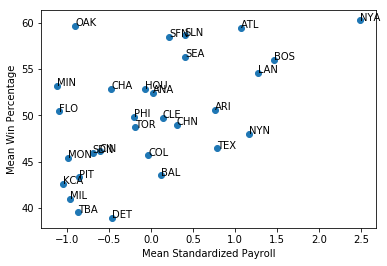

In [152]:
xvals = []
yvals = []

for (x, y) in zip(list(mspbin3.values()), list(total3.values())):
    xvals.append(x/y)

for (x, y) in zip(list(mwpbin3.values()), list(total3.values())):
    yvals.append(x/y)

# scatter plot for second bin values
plt.scatter(xvals, yvals)
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Win Percentage')

for i, txt in enumerate(mwpbin3):
    plt.annotate(txt, (xvals[i], yvals[i]))

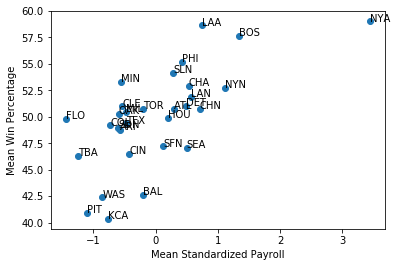

In [153]:
xvals = []
yvals = []

for (x, y) in zip(list(mspbin4.values()), list(total4.values())):
    xvals.append(x/y)

for (x, y) in zip(list(mwpbin4.values()), list(total4.values())):
    yvals.append(x/y)

# scatter plot for second bin values
plt.scatter(xvals, yvals)
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Win Percentage')

for i, txt in enumerate(mwpbin4):
    plt.annotate(txt, (xvals[i], yvals[i]))

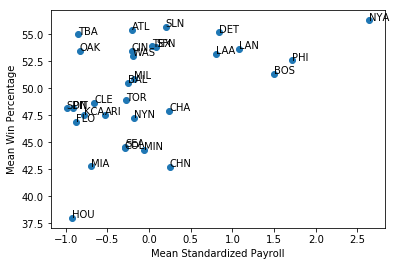

In [157]:
xvals = []
yvals = []

for (x, y) in zip(list(mspbin5.values()), list(total5.values())):
    xvals.append(x/y)

for (x, y) in zip(list(mwpbin5.values()), list(total5.values())):
    yvals.append(x/y)

# scatter plot for second bin values
plt.scatter(xvals, yvals)
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Win Percentage')

for i, txt in enumerate(mwpbin5):
    plt.annotate(txt, (xvals[i], yvals[i]))

In [ ]:
### QUESTION 3 ###
Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.

'''
The plots from Problem 4 and Problem 6 reflect the transformation on the payroll variable. Although the general trend seems to 
remain, there are some teams that are affected by the transformation on the payroll variable. The points seem to appear more
condensed after the transformation. 

'''

Text(0,0.5,'Winning Percentage')

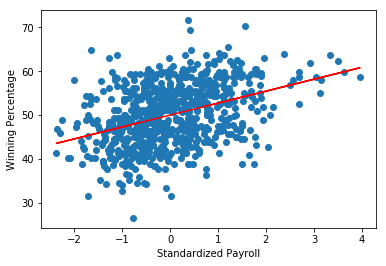

In [142]:
### PROBLEM 7 ### - CHAEWOON HONG
# winning percentage vs standardized payroll 

# x-axis: standardized payroll
s_payroll = []
# y-axis: winning percentage
wins = []

# add the standardized payrolls and win percentages from meanWRP to each array
for i,row in meanWRPs.iterrows():
    if row['yearID'] >= 1990:
        s_payroll.append(row['standardized_payrollij'])
        wins.append(row['win_percentage'])
     
        
plt.scatter(s_payroll,wins)

# draw the regression line
# m = slope and b = y-intercept
m,b = np.polyfit(s_payroll, wins, 1)

# calculate y = mx + b for each point and then create the regression line
yvals = []
index = 0
for y in wins:
    yvals.append(m * s_payroll[index] + b)
    index += 1
plt.plot(s_payroll, yvals , 'r')

# add labels
plt.xlabel('Standardized Payroll')
plt.ylabel('Winning Percentage')

Text(0.5,0,'Year')

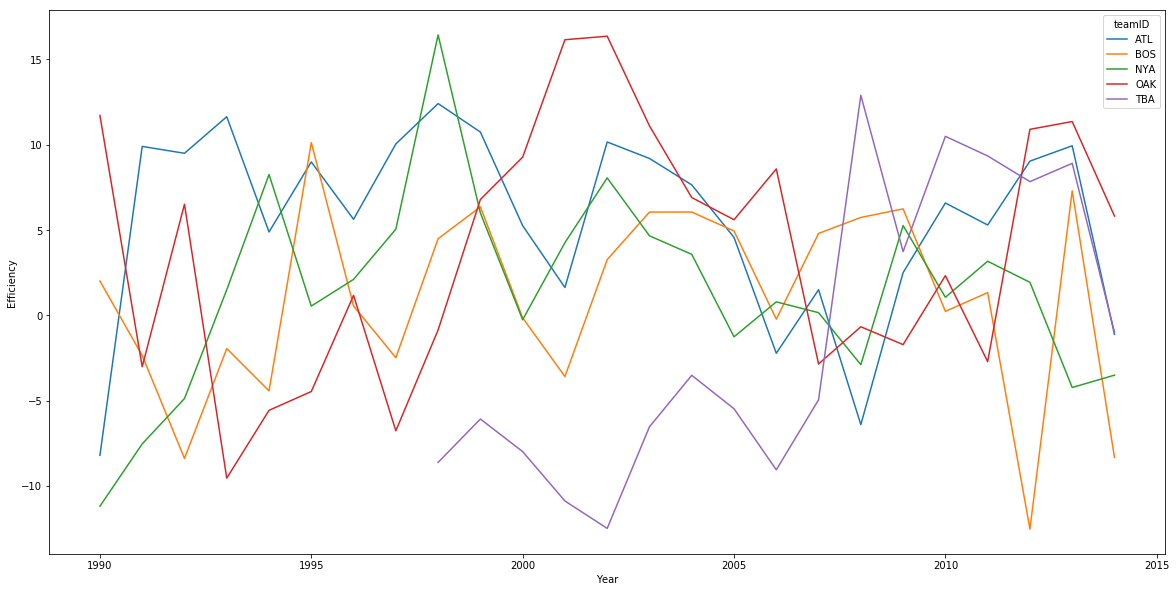

In [144]:
### PROBLEM 8 ### - AKSHAY ANIL

meanWRPs['expected_win_pctij'] = 50 + 2.5 * meanWRPs['standardized_payrollij']
meanWRPs['efficiencyij'] = meanWRPs['win_percentage'] - meanWRPs['expected_win_pctij']
# Filter out anything that isn't what we want
wantedTeams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
filtered = meanWRPs[meanWRPs['teamID'].isin(wantedTeams)]

filtered
# Create a plot where the x-axis is year, y-axis is efficiency, and individual lines for each team
filtered = filtered.pivot(index='yearID', columns='teamID', values='efficiencyij')
# Display the plot
tq = filtered.plot(figsize=(20,10))
tq.set_ylabel("Efficiency")
tq.set_xlabel("Year")

In [ ]:
### QUESTION 4 ### 

'''

From this plot, I can see how Oakland's spending efficiency compares to other teams more clearly. In this plot, if a point on 
the team's line is above another team's, then it means that that team has a more effective spending efficiency than the team
below it. On the other graphs, I had to make an educated guess on whether the team was effective in its spending. 
During the Moneyball period, Oakland's spending efficiency was good. It stays above 0 efficiency more than it stays below it,
and it has similar efficiency ratings as other teams like ATL and NYA who spent more than 3 times its payroll. 

'''

In [69]:
conn.close()